### Análisis Exploratorio de Datos (EDA)
Una vez generado el ETL de los dataset se procede a realizar un análisis exploratorio de datos para cada uno de estos

Importamos las librerías necesarias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

steam_parque.parquet 

In [7]:
#extraemos los datos
games = pd.read_parquet('Archivos/steam_parquet.parquet')
games

,genres,url,release_date,tags,reviews_url,specs,price,early_access,id,Año,publisher,app_name,title,developer
0,Action,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,['Strategy' 'Action' 'Indie' 'Casual' 'Simulat...,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
1,Casual,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,['Strategy' 'Action' 'Indie' 'Casual' 'Simulat...,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
2,Indie,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,['Strategy' 'Action' 'Indie' 'Casual' 'Simulat...,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
3,Simulation,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,['Strategy' 'Action' 'Indie' 'Casual' 'Simulat...,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
4,Strategy,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,['Strategy' 'Action' 'Indie' 'Casual' 'Simulat...,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71546,Indie,http://store.steampowered.com/app/610660/Russi...,2018-01-04,['Indie' 'Simulation' 'Racing'],http://steamcommunity.com/app/610660/reviews/?...,['Single-player' 'Steam Achievements' 'Steam T...,1.99,False,610660,2018,Laush Studio,Russian Roads,Russian Roads,Laush Dmitriy Sergeevich
71547,Racing,http://store.steampowered.com/app/610660/Russi...,2018-01-04,['Indie' 'Simulation' 'Racing'],http://steamcommunity.com/app/610660/reviews/?...,['Single-player' 'Steam Achievements' 'Steam T...,1.99,False,610660,2018,Laush Studio,Russian Roads,Russian Roads,Laush Dmitriy Sergeevich
71548,Simulation,http://store.steampowered.com/app/610660/Russi...,2018-01-04,['Indie' 'Simulation' 'Racing'],http://steamcommunity.com/app/610660/reviews/?...,['Single-player' 'Steam Achievements' 'Steam T...,1.99,False,610660,2018,Laush Studio,Russian Roads,Russian Roads,Laush Dmitriy Sergeevich
71549,Casual,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,['Indie' 'Casual' 'Puzzle' 'Singleplayer' 'Atm...,http://steamcommunity.com/app/658870/reviews/?...,['Single-player' 'Steam Achievements' 'Steam C...,4.99,False,658870,2017,SIXNAILS,EXIT 2 - Directions,EXIT 2 - Directions,"xropi,stev3ns"


In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71551 entries, 0 to 71550
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        71551 non-null  object 
 1   url           71551 non-null  object 
 2   release_date  71498 non-null  object 
 3   tags          71505 non-null  object 
 4   reviews_url   71551 non-null  object 
 5   specs         70994 non-null  object 
 6   price         71551 non-null  float64
 7   early_access  71551 non-null  bool   
 8   id            71551 non-null  int64  
 9   Año           71551 non-null  object 
 10  publisher     71504 non-null  object 
 11  app_name      71551 non-null  object 
 12  title         71551 non-null  object 
 13  developer     71551 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 7.2+ MB


In [9]:
# verificamos si se encuentran nulos
games.isnull().sum()

genres            0
url               0
release_date     53
tags             46
reviews_url       0
specs           557
price             0
early_access      0
id                0
Año               0
publisher        47
app_name          0
title             0
developer         0
dtype: int64

In [10]:
# como las columnas en que se encuentran los datos nulos no son necesarias, entonces las eliminamos, aquí eliminamos publusher debido a que es igual que developer
games.drop(columns=['specs', 'reviews_url','url', 'tags', 'publisher'], axis=1, inplace=True)
games.head(1)

,genres,release_date,price,early_access,id,Año,app_name,title,developer
0,Action,2018-01-04,4.99,False,761140,2018,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro


In [11]:
#modificamos el nombre de id para mejorar su comprensión 
games.rename(columns={'id':'item_id'}, inplace=True)
games.columns

Index(['genres', 'release_date', 'price', 'early_access', 'item_id', 'Año',
       'app_name', 'title', 'developer'],
      dtype='object')

Tratamos las variables categóricas

In [12]:
#contabilizamos los generos en la columna generos
generos= games['genres'].value_counts()
generos.to_frame

<bound method Series.to_frame of genres
Indie                        15858
Action                       11319
Casual                        8282
Adventure                     8242
Strategy                      6957
Simulation                    6699
RPG                           5479
Free to Play                  2031
Early Access                  1462
Sports                        1257
Massively Multiplayer         1108
Racing                        1083
Design &amp; Illustration      460
Utilities                      340
Web Publishing                 268
Animation &amp; Modeling       183
Education                      125
Video Production               116
Software Training              105
Audio Production                93
Photo Editing                   77
Accounting                       7
Name: count, dtype: int64>

c:\Users\Potato\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Potato\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Potato\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


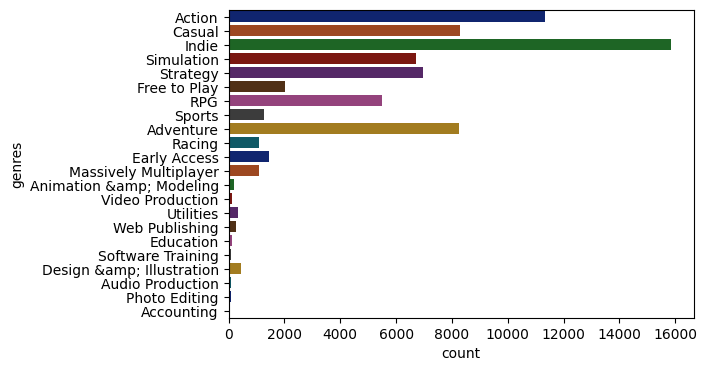

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=games, y ='genres', palette=('dark'))
plt.show()

**Conclusión**

Como podemos ver los generos 'Indie' y 'Action' son los más repetidos, posterior a ellos están los generos 'Casual' y 'Adventure'

In [22]:
# comprobamos la cantidad de juegos unicos en la plataforma
len(games['item_id'].unique())

28850

Comprobamos si en año hay datos mal cargados

In [30]:
games['Año'].value_counts()

Año
2017        25199
2016        17693
2015        12272
2014         6367
2013         3017
2012         2107
2011          987
2010          663
2018          499
2009          492
sin dato      338
2008          332
2007          259
2006          217
2005          139
2003          118
2001          109
2004           92
1999           80
1998           75
1997           64
2002           62
1996           56
2000           55
1994           52
1995           49
1993           40
1992           24
1991           22
1990           14
2019           13
1989           11
1988            9
1984            5
1987            5
1986            5
1983            3
2021            3
1985            1
Name: count, dtype: int64

In [29]:
#eliminamos la fila con el dato erroneo, ya que podría generar una distorsión en el analisis
año= '5275'
games= games.drop(games[games['Año'] == '5275'].index)

c:\Users\Potato\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Potato\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Potato\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


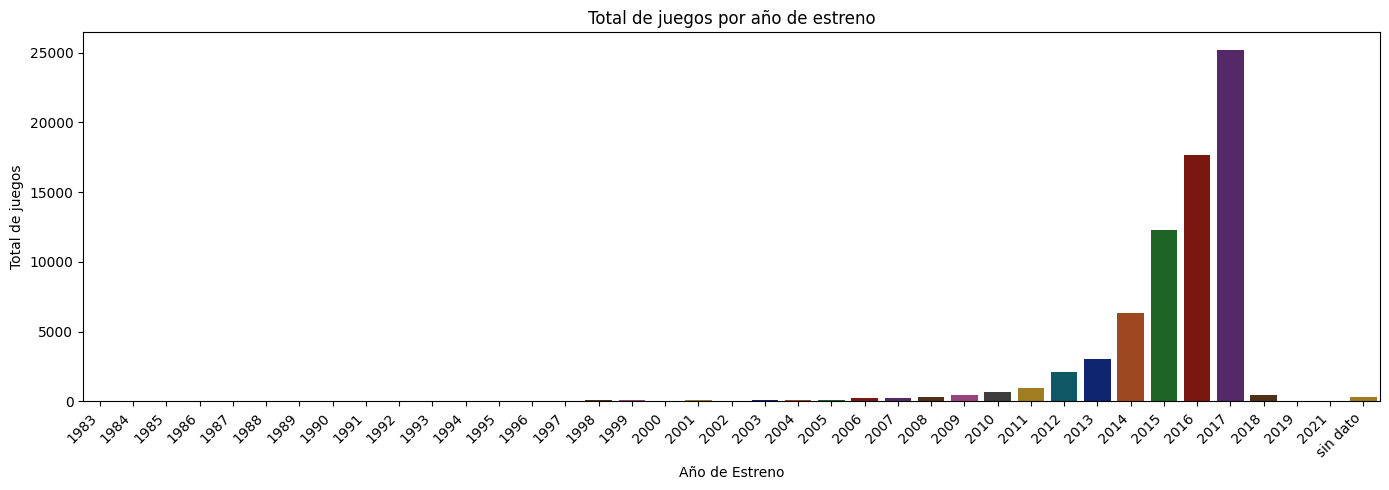

In [33]:
# ordenamos los datos para poder graficarlos
años = games['Año'].value_counts()
años = años.reindex(['sin dato'] + list(años.index))
años = años.sort_index()

plt.figure(figsize=(14,5))
sns.barplot(x= años.index, y=años.values, palette='dark')
plt.xlabel('Año de Estreno')
plt.ylabel('Total de juegos')
plt.title('Total de juegos por año de estreno')
plt.xticks(rotation= 45,ha='right')
plt.tight_layout()
plt.show() 

**Conclusión** 

Como podemos ver en el 2017 se encuentra la mayor cantidad de estrenos y entre los años 2012 y 2017 hay una mayor concentración de estrenos

c:\Users\Potato\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Potato\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Potato\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Potato\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

<function matplotlib.pyplot.show(close=None, block=None)>

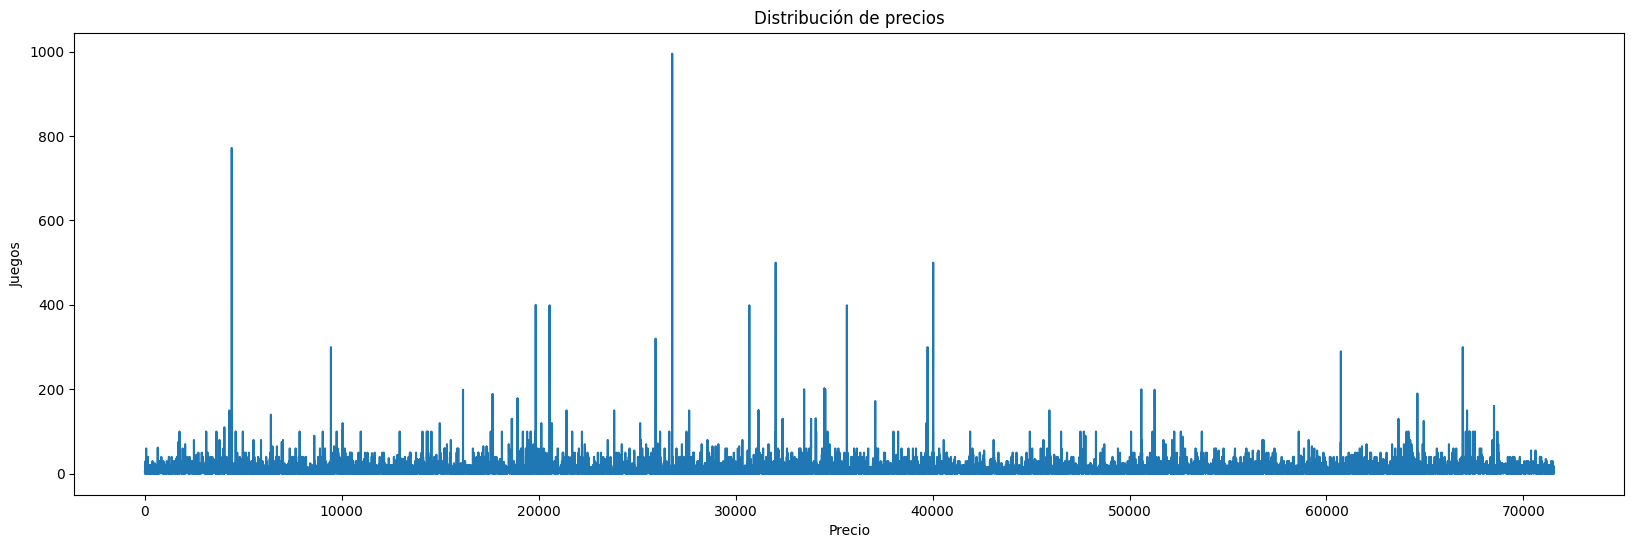

In [34]:
#graficamos la columna de precios para verificar si encontramos outliers
plt.figure(figsize=(20,6))
sns.lineplot(games['price'])
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Juegos')
plt.show

c:\Users\Potato\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


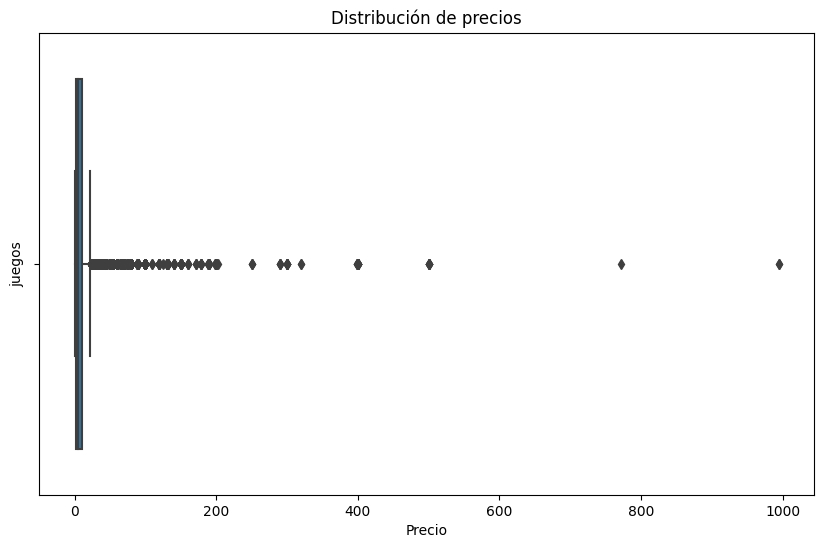

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x=games['price'])
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('juegos')
plt.show()

In [38]:
# al detectar algunos outliers pasamos a analizarlos en el siiguiente codigo
outlier= games.nlargest(5,'price')
outlier

,genres,release_date,price,early_access,item_id,Año,app_name,title,developer
26776,Animation &amp; Modeling,2017-10-26,995.00,False,719000,2017,Strata Spaces VR – Professional Edition Upgrade,Strata Spaces VR – Professional Edition Upgrade,"Strata Mixed Reality, Inc."
26777,Design &amp; Illustration,2017-10-26,995.00,False,719000,2017,Strata Spaces VR – Professional Edition Upgrade,Strata Spaces VR – Professional Edition Upgrade,"Strata Mixed Reality, Inc."
4411,Simulation,2014-07-14,771.71,False,292180,2014,X-Plane 10 Global - 64 Bit,X-Plane 10 Global - 64 Bit,Laminar Research
32028,Animation &amp; Modeling,2017-11-06,499.99,False,691560,2017,CUR3D Maker Edition - Permission for commercia...,CUR3D Maker Edition - Permission for commercia...,RUHRSOURCE GmbH
32029,Design &amp; Illustration,2017-11-06,499.99,False,691560,2017,CUR3D Maker Edition - Permission for commercia...,CUR3D Maker Edition - Permission for commercia...,RUHRSOURCE GmbH


**Conclusión** 

Como podemos ver en la anterior tabla los 'outliers' que se ven en el grafico solamente se deben a el valor elevado de los juegos

Extraemos el dataset 'reviews_analysis.parquet' para su respectivo analisis 

In [39]:
reviews = pd.read_parquet('Archivos/reviews_analysis.parquet')
reviews

,user_id,item_id,posted,recommend,sentiment_analysis
0,76561197970982479,1250,2011-11-05,True,2
1,76561197970982479,22200,2011-07-15,True,2
2,76561197970982479,43110,2011-04-21,True,2
3,js41637,251610,2014-06-24,True,2
4,js41637,227300,2013-09-08,True,0
...,...,...,...,...,...
59156,Fuckfhaisjnsnsjakaka,70,None,True,2
59157,3214213216,362890,None,True,2
59158,ChrisCoroner,273110,None,True,2
59159,CaptainAmericaCw,730,None,True,2


In [40]:
#transformamos la fecha de posteo a tipo datetime para analizarlo en un grafico
reviews['posted'] = pd.to_datetime(reviews['posted'])

c:\Users\Potato\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Potato\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Potato\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


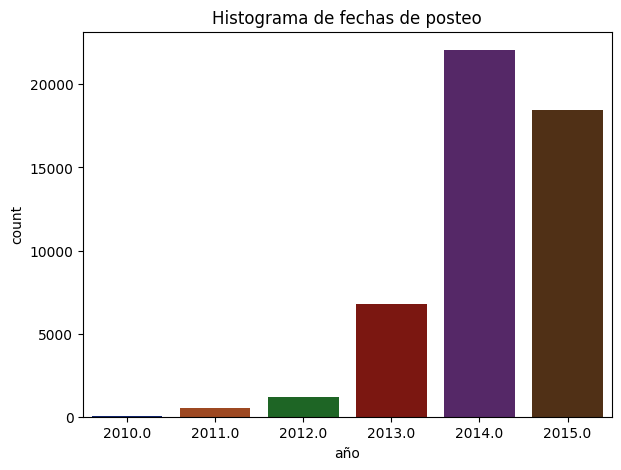

In [43]:
reviews['año'] = reviews['posted'].dt.year
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Histograma de fechas de posteo')
sns.countplot(data=reviews, x= 'año', palette='dark')
plt.show()

**Conclusión**

como vemos en el gráfico el año con mayor posteos es el 2014


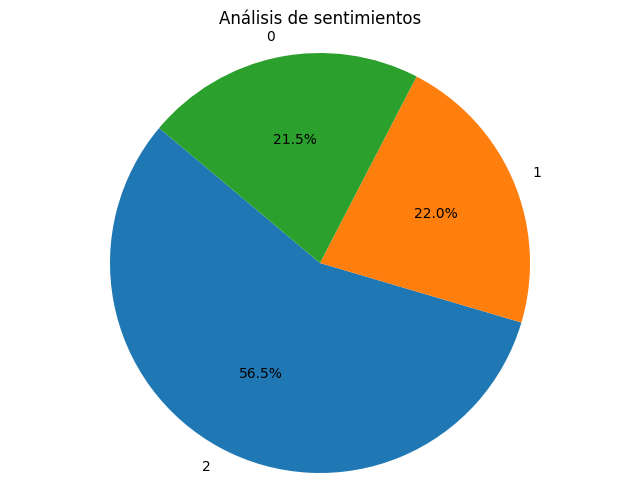

In [44]:
#realizamos un gráfico para la columna sentiment_analysis
sentiment= reviews['sentiment_analysis'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(sentiment, labels= sentiment.index, autopct='%1.1f%%', startangle= 140)
plt.title('Análisis de sentimientos')
plt.axis('equal') #nos aseguramos que el gráfico se muestre como un círculo
plt.show()

**Conclusión**

Observamos que más del 50% de los reviews son positivos y los negativos y neutros se dividen entre casi un 20% cada uno 

### Preparamos los dataset para el modelado de recomendación

In [46]:
#creamos un dataframe con las columnas a utilizar
modelo = games[['item_id','app_name','genres']]
modelo.head(2)

,item_id,app_name,genres
0,761140,Lost Summoner Kitty,Action
1,761140,Lost Summoner Kitty,Casual


In [47]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71548 entries, 0 to 71550
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   71548 non-null  int64 
 1   app_name  71548 non-null  object
 2   genres    71548 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [48]:
#guardamos el archivo para su posterior uso
modelo.to_csv('Archivos/modelo.csv', index=False)

In [49]:
model = pd.read_csv('Archivos/modelo.csv')

In [51]:
model.to_parquet('Archivos/model.parquet')